## Análise Exploratória de Dados Cavid Picos - ALUNO ***

#### Neste notebook usaremos uma pesquisa recente realizada em Picos sobre o covid na região. Nosso objetivo é fazer uma investigação inicial dos dados a fim de detectar problemas com os dados, necessidade de mais variáveis, falhas na organização e necessidades de transformação.

In [64]:
# Importando os pacotes 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mat
import matplotlib.pyplot as plt

## : Neste seção você deve carregar o dataset (Apenas a primeira pagina):
    - Apresentar as informações gerais
    - Renomear as colunas (Para fascilitar o acesso as variaveis)
    - Identificar valores ausentes(Nulos) e Trata-los: Você pode excluir as linhas, colunas, substituir valores, enfim. Escolha a o método que acha correto e explique o motivo da escolha. 
    - Identificar dados que podem ser convertidos em dados categoricos e trata-los
    
    OBS: Sempre que for excluir uma informação faça uma copia do dataset original. Exemplo: df (original), df_clean(valore ausentes tratados), df_categoricos (Apenas com as variaveis categoricas)

In [2]:
# Carregando o dataset (Apenas pagina 1 com coluna ID se index)
#(Coloque o código aqui)
df = pd.read_csv("covid_picos - Completo.csv", sep=",")

In [3]:
#renomenado colunas (Utilize a lista abaixo como nome nome para as colunas)
columns1 = ['Id','Numero_da_Notificacao','Data_da_Notificacao','Data_do_inicio_dos_sintomas','Profissional_de_Seguranca',
'Raca_Cor','Sexo','Data_de_Nascimento','Idade','Bairro','Sintoma_Dor_de_Garganta','Sintoma_Dispneia','Sintoma_Febre','Sintoma_Tosse',
'Sintoma_Outros','Sintoma_Dor_de_cabeca','Sintoma_Disturbio_Gustativo','Sintoma_Disturbio_Olfativo','Sintoma_Coriza','Assintomatico',
'Condições_Doenças_respiratorias_cronicas_descompensadas','Condições_Doenças_cardiacas_cronicas','Condições_Diabetes','Condições_Doencas_renais_cronicas_',
'Condições_Imunossupressao','Condições_Gestante','Condições_Portador_de_doenças_cromossómicas','Condições_Obesidade',
'Tipo_de_Teste','Classificacao_Final','Evolucao_do_Caso']

In [4]:
df.head(3)

,ID,Nº da notificação,Data da Notificação,Data do início dos sintomas,É profissional de saúde?,Raça/Cor,Sexo,Data de Nascimento,Idade,Bairro,...,Condições - Doenças cardíacas crônicas,Condições - Diabetes,Condições - Doenças renais crônicas,Condições - Imunossupressão,Condições- Gestante,Condições - Portador de doenças cromossómicas,Condições - Obesidade,Tipo de Teste,Classificação Final,Evolução do Caso
0,1,2.220004e+11,4/25/2020,4/18/2020,Sim,Branca,Feminino,8/7/1986,33,MALVA,...,Não,Não,Não,Não,Não,Não,Não,TESTE RAPIDO - ANTICORPO,Confirmado Laboratorial,Cura
1,2,2.220004e+11,4/25/2020,3/23/2020,Não,Parda,Masculino,4/22/1985,35,PASSAGEM DAS PEDRAS,...,Não,Não,Não,Não,Não,Não,Não,TESTE RAPIDO - ANTICORPO,Confirmado Laboratorial,Cura
2,3,2.220004e+11,4/25/2020,4/15/2020,Sim,Parda,Feminino,11/19/1988,31,PASSAGEM DAS PEDRAS,...,Não,Não,Não,Não,Não,Não,Não,TESTE RAPIDO - ANTICORPO,Confirmado Laboratorial,Cura


In [5]:
#Aprensentando informações gerais
df_rename = df.set_axis(columns1, axis="columns")
df_rename.head(3)

,Id,Numero_da_Notificacao,Data_da_Notificacao,Data_do_inicio_dos_sintomas,Profissional_de_Seguranca,Raca_Cor,Sexo,Data_de_Nascimento,Idade,Bairro,...,Condições_Doenças_cardiacas_cronicas,Condições_Diabetes,Condições_Doencas_renais_cronicas_,Condições_Imunossupressao,Condições_Gestante,Condições_Portador_de_doenças_cromossómicas,Condições_Obesidade,Tipo_de_Teste,Classificacao_Final,Evolucao_do_Caso
0,1,2.220004e+11,4/25/2020,4/18/2020,Sim,Branca,Feminino,8/7/1986,33,MALVA,...,Não,Não,Não,Não,Não,Não,Não,TESTE RAPIDO - ANTICORPO,Confirmado Laboratorial,Cura
1,2,2.220004e+11,4/25/2020,3/23/2020,Não,Parda,Masculino,4/22/1985,35,PASSAGEM DAS PEDRAS,...,Não,Não,Não,Não,Não,Não,Não,TESTE RAPIDO - ANTICORPO,Confirmado Laboratorial,Cura
2,3,2.220004e+11,4/25/2020,4/15/2020,Sim,Parda,Feminino,11/19/1988,31,PASSAGEM DAS PEDRAS,...,Não,Não,Não,Não,Não,Não,Não,TESTE RAPIDO - ANTICORPO,Confirmado Laboratorial,Cura


In [6]:
#Identificando valores ausentes

#retorna valores estatisticos para variaveis numericas
df_rename.describe()



,Id,Numero_da_Notificacao,Idade
count,4525.000000,4.521000e+03,4525.000000
mean,2263.000000,2.271392e+11,40.601547
std,1306.399314,1.019331e+11,17.482457
min,1.000000,1.120062e+11,0.000000
25%,1132.000000,2.220111e+11,28.000000
50%,2263.000000,2.220192e+11,38.000000
75%,3394.000000,2.220356e+11,52.000000
max,4525.000000,4.120039e+12,104.000000


In [7]:
#retorna resumo de valores nao nulos
df_rename.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4525 entries, 0 to 4524
Data columns (total 31 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Id                                                       4525 non-null   int64  
 1   Numero_da_Notificacao                                    4521 non-null   float64
 2   Data_da_Notificacao                                      4521 non-null   object 
 3   Data_do_inicio_dos_sintomas                              4521 non-null   object 
 4   Profissional_de_Seguranca                                4525 non-null   object 
 5   Raca_Cor                                                 4515 non-null   object 
 6   Sexo                                                     4525 non-null   object 
 7   Data_de_Nascimento                                       4525 non-null   object 
 8   Idade                       

In [8]:
#retorna a soma dos valores nulos encontrados
df_rename.isnull().sum()

Id                                                           0
Numero_da_Notificacao                                        4
Data_da_Notificacao                                          4
Data_do_inicio_dos_sintomas                                  4
Profissional_de_Seguranca                                    0
Raca_Cor                                                    10
Sexo                                                         0
Data_de_Nascimento                                           0
Idade                                                        0
Bairro                                                       0
Sintoma_Dor_de_Garganta                                      4
Sintoma_Dispneia                                             2
Sintoma_Febre                                                4
Sintoma_Tosse                                                4
Sintoma_Outros                                               4
Sintoma_Dor_de_cabeca                                  

In [54]:
#Tratando valores ausentes

#retira os valores nulos da evoolução dos casos resultando em classificação final os 91 valores nulos onde
# nas mesmas linhas contém 91 óbitos na coluna Classificação final
df_rename.dropna(subset= ["Evolucao_do_Caso"], inplace=True)

##logo os mesmos podem ser confirmados
df_rename["Classificacao_Final"].fillna("Confirmado Laboratorial", inplace=True)


In [10]:
df_rename.Classificacao_Final.value_counts()

Confirmado Laboratorial                4247
Confirmado ClÃ­nico-EpidemiolÃ³gico       5
Descartado                                3
Confirmado ClÃ­nico-Imagem                1
Confirmado Clinico-Epidemiologico         1
Name: Classificacao_Final, dtype: int64

In [11]:
lista = ["Profissional_de_Seguranca", "Condições_Doenças_cardiacas_cronicas", "Condições_Diabetes", "Condições_Doencas_renais_cronicas_","Condições_Imunossupressao", "Condições_Gestante", "Condições_Portador_de_doenças_cromossómicas", "Condições_Obesidade"]

In [12]:
# Tranformando strings em numeros (Neste caso converta apenas as variaveis com SIM ou Não)
for a in df_rename:
    if a in lista:
        df_rename = df_rename.replace({'Sim': 1})
        df_rename = df_rename.replace({'Não': 0})

In [13]:
df_rename.head(5)

,Id,Numero_da_Notificacao,Data_da_Notificacao,Data_do_inicio_dos_sintomas,Profissional_de_Seguranca,Raca_Cor,Sexo,Data_de_Nascimento,Idade,Bairro,...,Condições_Doenças_cardiacas_cronicas,Condições_Diabetes,Condições_Doencas_renais_cronicas_,Condições_Imunossupressao,Condições_Gestante,Condições_Portador_de_doenças_cromossómicas,Condições_Obesidade,Tipo_de_Teste,Classificacao_Final,Evolucao_do_Caso
0,1,2.220004e+11,4/25/2020,4/18/2020,1,Branca,Feminino,8/7/1986,33,MALVA,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TESTE RAPIDO - ANTICORPO,Confirmado Laboratorial,Cura
1,2,2.220004e+11,4/25/2020,3/23/2020,0,Parda,Masculino,4/22/1985,35,PASSAGEM DAS PEDRAS,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TESTE RAPIDO - ANTICORPO,Confirmado Laboratorial,Cura
2,3,2.220004e+11,4/25/2020,4/15/2020,1,Parda,Feminino,11/19/1988,31,PASSAGEM DAS PEDRAS,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TESTE RAPIDO - ANTICORPO,Confirmado Laboratorial,Cura
3,4,2.220004e+11,4/26/2020,4/10/2020,1,Parda,Feminino,9/9/1988,31,PEDRINHAS,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TESTE RAPIDO - ANTICORPO,Confirmado Laboratorial,Cura
4,5,2.220005e+11,4/27/2020,4/27/2020,0,Amarela,Masculino,2/11/1967,53,CENTRO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TESTE RAPIDO - ANTICORPO,Confirmado Laboratorial,Cura


In [14]:
df_rename["Evolucao_do_Caso"].value_counts()

Cura     4257
Obito      91
Name: Evolucao_do_Caso, dtype: int64

## : A seguir gere os graficos ou imagens que impliquem na resposta de cada afirmação/pergunta citada abaixo.

Para todas as analises abaixo descreva a resposta de acordo com sua interpretação. Fique a vontade para gerar novas informações. Pense que essas informações podem auxiliar a prefeitura de picos na melhor tomada de decisão neste contexto.

Para quem quiser melhor gerar graficos sugiro assistir a palestra sobre visualização de dados (Link no material semana 2). 
Link dos exemplos de figuras com matplotlib: https://matplotlib.org/stable/gallery/index.html


### Distribuição de Idade

In [15]:
x= df_rename.Idade.value_counts()

In [16]:
x.sort_index()

0       7
1       7
2      11
3       6
4       4
       ..
94      1
99      1
100     1
101     1
104     1
Name: Idade, Length: 99, dtype: int64

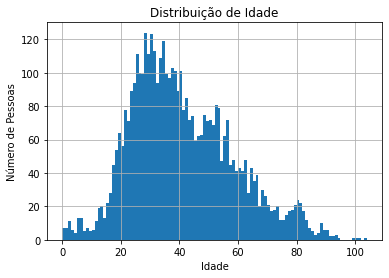

In [17]:
# Qual a distribuição de idade dos participantes da pesquisa? (Histograma)
df_rename.Idade.hist(bins=104)
plt.xlabel("Idade")
plt.ylabel("Número de Pessoas")
plt.title("Distribuição de Idade")
plt.show()


### Distribuição de Sexo

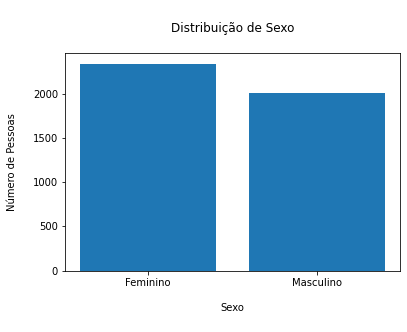

In [18]:
# Qual é a distribuição de sexo dos participantes da pesquisa?
df_sex = df_rename.Sexo.value_counts().index
df_sex_qtd = df_rename.Sexo.value_counts()


plt.bar(df_sex, df_sex_qtd)
plt.xlabel("\nSexo\n")
plt.ylabel("Número de Pessoas\n")
plt.title("\nDistribuição de Sexo\n")
plt.show()

### Relação de Idade (por Faixa Etaria) e Casos Assintomatico

In [19]:
df_rename.Assintomatico.value_counts()

0.0    3535
1.0     809
Name: Assintomatico, dtype: int64

In [20]:
df_rename.Assintomatico.isnull().sum()

4

In [21]:
df_rename["Assintomatico"].fillna("0")

0       0.0
1       0.0
2       0.0
3       0.0
4       1.0
       ... 
4520    0.0
4521    0.0
4522    0.0
4523    0.0
4524    0.0
Name: Assintomatico, Length: 4348, dtype: object

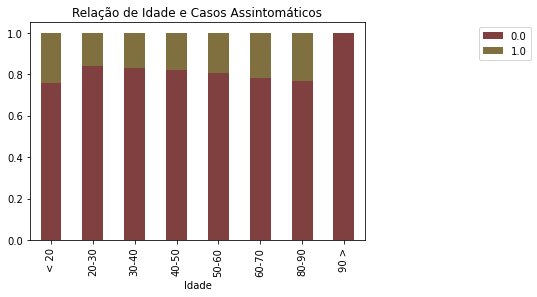

In [22]:

# Qual a faixa etaria com maior indice de pessoas assintomaticas?
import colorsys


df_idades = df_rename.copy()
bins = [0, 20, 30, 40, 50, 60, 80, 90, 100]

df_idades["Idade"] = pd.cut(df_idades["Idade"],
                           bins, labels=["< 20", "20-30", "30-40", "40-50", "50-60", "60-70", "80-90", "90 >"])


df_casos = pd.crosstab(df_idades.Idade, df_idades.Assintomatico).apply(lambda r: r/r.sum(), axis=1)

#quantidade
num = len(df_idades.Idade.value_counts().index)

# Criando a lista de cores
listaHSV = [(x*1.0/num, 0.5, 0.5) for x in range(num)]
listaRGB = list(map(lambda x: colorsys.hsv_to_rgb(*x), listaHSV))

# Gráfico de Barras (Stacked)
ax1 = df_casos.plot(kind = "bar", stacked = True, color = listaRGB, title = "Relação de Idade e Casos Assintomáticos")
lines, labels = ax1.get_legend_handles_labels()
ax1.legend(lines, labels, bbox_to_anchor = (1.51, 1))

## R- Vemos então que o maior indice fica entre entre menores de 20 anos


### Relação da evolução de casos por faixa etaria de idade

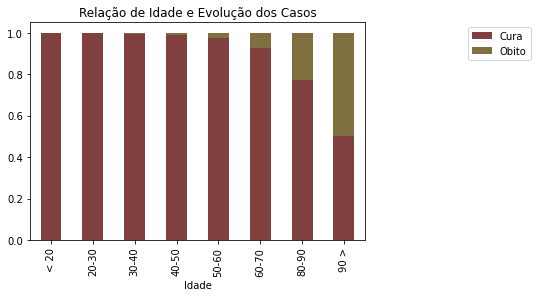

In [23]:
# Qual a relação entre a Idade e evolução do caso?
df_evolucao = df_rename.copy()
bins = [0, 20, 30, 40, 50, 60, 80, 90, 100]

df_evolucao["Idade"] = pd.cut(df_evolucao["Idade"],
                           bins, labels=["< 20", "20-30", "30-40", "40-50", "50-60", "60-70", "80-90", "90 >"])


df_relacao = pd.crosstab(df_evolucao.Idade, df_evolucao.Evolucao_do_Caso).apply(lambda r: r/r.sum(), axis=1)

#quantidade
num = len(df_evolucao.Idade.value_counts().index)

# Criando a lista de cores
listaHSV = [(x*1.0/num, 0.5, 0.5) for x in range(num)]
listaRGB = list(map(lambda x: colorsys.hsv_to_rgb(*x), listaHSV))

# Gráfico de Barras (Stacked)
ax1 = df_relacao.plot(kind = "bar", stacked = True, color = listaRGB, title = "Relação de Idade e Evolução dos Casos")
lines, labels = ax1.get_legend_handles_labels()
ax1.legend(lines, labels, bbox_to_anchor = (1.51, 1))


### Distribuição racial em casos de covid

In [24]:
# Demonstrar o distribuição racial em casos de covid!

In [25]:
df_rename["Raca_Cor"].value_counts()

Parda       2175
Branca      1214
Amarela      661
Preta        159
Ignorado     126
Indigena       3
Name: Raca_Cor, dtype: int64

In [26]:
df_rename["Raca_Cor"].fillna("Ignorado", inplace=True)

In [41]:
df_rename["Raca_Cor"].isnull().sum()

0

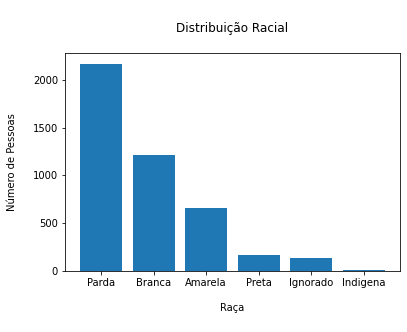

In [28]:
df_raca = df_rename.Raca_Cor.value_counts().index

df_raca_qtd = df_rename.Raca_Cor.value_counts()


plt.bar(df_raca, df_raca_qtd)
plt.xlabel("\nRaça\n")
plt.ylabel("Número de Pessoas\n")
plt.title("\nDistribuição Racial\n")
plt.show()

In [55]:
# Demonstrar o distribuição racial em casos com evolução ao Obito!
evolucao = df_rename.loc[df_rename['Evolucao_do_Caso'] == "Obito"]
evolucao

,Id,Numero_da_Notificacao,Data_da_Notificacao,Data_do_inicio_dos_sintomas,Profissional_de_Seguranca,Raca_Cor,Sexo,Data_de_Nascimento,Idade,Bairro,...,Condições_Doenças_cardiacas_cronicas,Condições_Diabetes,Condições_Doencas_renais_cronicas_,Condições_Imunossupressao,Condições_Gestante,Condições_Portador_de_doenças_cromossómicas,Condições_Obesidade,Tipo_de_Teste,Classificacao_Final,Evolucao_do_Caso
4434,4435,3.158712e+11,4/17/2020,4/15/2020,0,Parda,Feminino,6/2/1940,79,CANTO DA VARZEA,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,RT-PCR,Confirmado Laboratorial,Obito
4435,4436,3.159647e+11,4/25/2020,4/16/2020,0,Parda,Masculino,11/30/1968,51,PEDRINHAS,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,RT-PCR,Confirmado Laboratorial,Obito
4436,4437,3.159024e+11,5/23/2020,5/22/2020,0,Parda,Masculino,4/29/1964,56,AROEIRA DO MATADOURO,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,RT-PCR,Confirmado Laboratorial,Obito
4437,4438,3.159154e+11,6/7/2020,5/11/2020,0,Parda,Feminino,3/13/1933,87,PARAIBINHA,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,RT-PCR,Confirmado Laboratorial,Obito
4438,4439,3.159165e+11,6/8/2020,6/6/2020,0,Parda,Masculino,11/1/1979,40,CARNAIBAS,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,RT-PCR,Confirmado Laboratorial,Obito
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4520,4521,3.160521e+11,11/12/2020,10/31/2020,0,Parda,Feminino,5/25/1935,85,BOA SORTE,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,RT-PCR,Confirmado Laboratorial,Obito
4521,4522,3.160562e+11,11/17/2020,10/27/2020,0,Parda,Masculino,8/17/1946,74,UMARI,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,RT-PCR,Confirmado Laboratorial,Obito
4522,4523,3.160578e+11,11/19/2020,11/13/2020,0,Parda,Masculino,5/19/1944,76,JUNCO,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,RT-PCR,Confirmado Laboratorial,Obito
4523,4524,3.160616e+11,23/11/2020,11/7/2020,0,Parda,Masculino,8/8/1964,56,BOA VISTA,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,RT-PCR,Confirmado Laboratorial,Obito


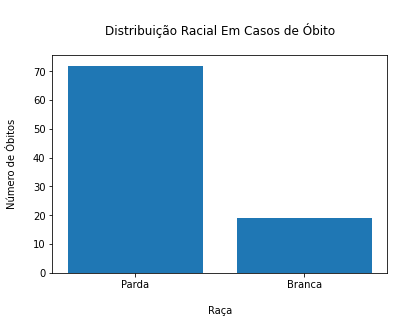

In [94]:
df_raca = evolucao.Raca_Cor.value_counts().index

df_raca_qtd = evolucao.Raca_Cor.value_counts()


plt.bar(df_raca, df_raca_qtd)
plt.xlabel("\nRaça\n")
plt.ylabel("Número de Óbitos\n")
plt.title("\nDistribuição Racial Em Casos de Óbito\n")
plt.show()

### Matriz de Correlação

In [62]:
#Identificando a correlação entre as variáveis
correlacao = df_rename.corr()
correlacao

,Id,Numero_da_Notificacao,Profissional_de_Seguranca,Idade,Sintoma_Dor_de_Garganta,Sintoma_Febre,Sintoma_Tosse,Sintoma_Coriza,Assintomatico,Condições_Doenças_respiratorias_cronicas_descompensadas,Condições_Doenças_cardiacas_cronicas,Condições_Diabetes,Condições_Doencas_renais_cronicas_,Condições_Imunossupressao,Condições_Gestante,Condições_Portador_de_doenças_cromossómicas,Condições_Obesidade
Id,1.000000,0.059973,-0.066386,0.078574,-0.030585,-0.049361,-0.019888,0.141508,-0.019810,0.071610,0.112162,0.110957,0.045535,0.040593,-0.000649,0.023299,0.058998
Numero_da_Notificacao,0.059973,1.000000,-0.009757,0.045944,-0.013242,-0.005543,-0.000921,-0.017239,0.025448,0.009487,0.041735,0.044277,0.017504,0.008640,-0.002792,-0.001091,0.009311
Profissional_de_Seguranca,-0.066386,-0.009757,1.000000,-0.066268,0.000895,-0.045240,-0.019907,0.033126,0.034165,-0.021233,-0.045071,-0.042600,-0.013878,-0.012133,0.007834,-0.004753,-0.008895
Idade,0.078574,0.045944,-0.066268,1.000000,-0.103659,0.008003,0.081307,-0.032742,0.009143,0.022227,0.334240,0.230271,0.069473,0.040098,-0.036878,0.033763,0.006667
Sintoma_Dor_de_Garganta,-0.030585,-0.013242,0.000895,-0.103659,1.000000,0.182075,0.149765,0.046710,-0.232799,0.014001,-0.045183,-0.029009,-0.029953,-0.005724,0.026175,-0.010573,-0.002683
Sintoma_Febre,-0.049361,-0.005543,-0.045240,0.008003,0.182075,1.000000,0.281159,-0.015989,-0.361824,-0.005402,0.069287,0.053580,0.023571,0.009812,-0.033723,-0.016621,0.022421
Sintoma_Tosse,-0.019888,-0.000921,-0.019907,0.081307,0.149765,0.281159,1.000000,0.061953,-0.316237,0.031269,0.109884,0.105960,0.024605,0.008530,0.008530,-0.014470,0.028425
Sintoma_Coriza,0.141508,-0.017239,0.033126,-0.032742,0.046710,-0.015989,0.061953,1.000000,-0.184542,-0.020821,-0.034818,-0.023543,-0.023683,0.003587,0.003587,-0.008360,0.022177
Assintomatico,-0.019810,0.025448,0.034165,0.009143,-0.232799,-0.361824,-0.316237,-0.184542,1.000000,-0.045812,-0.099036,-0.069730,-0.009571,-0.004564,-0.004564,0.044862,-0.017796
Condições_Doenças_respiratorias_cronicas_descompensadas,0.071610,0.009487,-0.021233,0.022227,0.014001,-0.005402,0.031269,-0.020821,-0.045812,1.000000,0.051082,0.059516,-0.008115,0.024832,0.024832,-0.002865,-0.004964


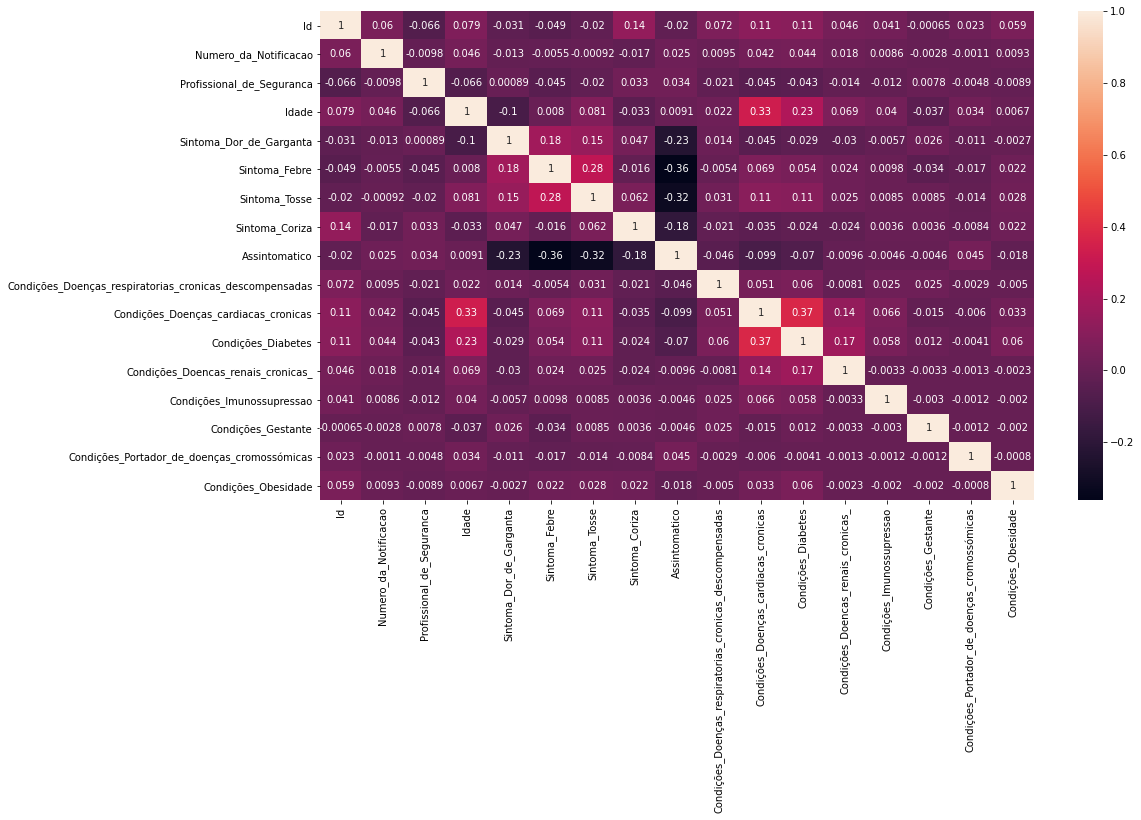

In [66]:
plt.figure(figsize=(16, 9))
sns.heatmap(correlacao, annot=True)
plt.show()